# Analysis of host prices of Seattle AirBnB
We will use the Seattle AirBnB dataset combined with the Poi dataset generated using the Overpass API.
I report here the three business questions to we will respond:
1. How much does cost accommodation in Seattle?
2. Which factors do they influence the price?
3. Do Poi influence the price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import preprocessing
import  sklearn as s
%matplotlib inline

airbnb_df = pd.read_csv('listings.csv')
poi_df = pd.read_csv('seattle_poi.csv')

Now, we go to look inside the Airbnb dataset. The first step detects the column's price.

In [2]:
[i for i in airbnb_df.columns.tolist() if 'price' in i]

['price', 'weekly_price', 'monthly_price']

We found three columns daily, weekly and monthly price. Now the three questions can have three different answers each one. We explore more in deep the difference between the three types of price.

In [3]:
airbnb_df[['price', 'weekly_price', 'monthly_price']].isnull().mean()

price            0.000000
weekly_price     0.473808
monthly_price    0.602672
dtype: float64

In [4]:
airbnb_df.drop(columns=['weekly_price','monthly_price']).describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
airbnb_df[airbnb_df['weekly_price'].isnull() == False].drop(columns=['price','monthly_price']).describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,2.009000e+03,2.009000e+03,2.009000e+03,2007.000000,2007.000000,2009.000000,2009.000000,2009.000000,2001.000000,2005.000000,...,1792.000000,1787.000000,1789.000000,1787.000000,1789.000000,1788.000000,1787.000000,0.0,2009.000000,1800.000000
mean,5.118851e+06,2.016010e+13,1.468009e+07,4.857997,4.857997,47.629659,-122.332230,3.282728,1.237881,1.284788,...,94.601004,9.626189,9.542202,9.787913,9.801006,9.585570,9.471181,NaN,3.261324,2.016972
std,2.864888e+06,0.000000e+00,1.386092e+07,15.915100,15.915100,0.044921,0.032757,1.901380,0.550122,0.871020,...,6.662298,0.722497,0.817887,0.593271,0.582730,0.655529,0.763555,NaN,6.733021,1.756977
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.416362,1.000000,0.500000,0.000000,...,20.000000,2.000000,4.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,2.746782e+06,2.016010e+13,2.911360e+06,1.000000,1.000000,47.607951,-122.355344,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.690000
50%,5.500398e+06,2.016010e+13,9.365736e+06,1.000000,1.000000,47.625255,-122.327712,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.470000
75%,7.649837e+06,2.016010e+13,2.409199e+07,3.000000,3.000000,47.664437,-122.309165,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,2.930000
max,1.033914e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,4.500000,6.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
airbnb_df[airbnb_df['monthly_price'].isnull() == False].drop(columns=['price','weekly_price']).describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,1.517000e+03,1.517000e+03,1.517000e+03,1516.000000,1516.000000,1517.000000,1517.000000,1517.000000,1511.000000,1515.000000,...,1356.000000,1352.000000,1355.000000,1352.000000,1355.000000,1353.000000,1353.000000,0.0,1517.000000,1361.000000
mean,5.086702e+06,2.016010e+13,1.439918e+07,5.629288,5.629288,47.630234,-122.331885,3.346737,1.212773,1.277888,...,94.233038,9.604290,9.530627,9.762574,9.766790,9.541759,9.425721,NaN,3.773896,2.061896
std,2.898048e+06,0.000000e+00,1.364368e+07,20.516075,20.516075,0.045524,0.032681,1.905349,0.528238,0.843817,...,6.974194,0.752639,0.822271,0.645422,0.638676,0.687962,0.775353,NaN,7.578675,1.706424
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.508394,-122.416362,1.000000,0.500000,0.000000,...,20.000000,2.000000,4.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,2.638086e+06,2.016010e+13,2.911360e+06,1.000000,1.000000,47.607582,-122.354435,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.760000
50%,5.422159e+06,2.016010e+13,9.077850e+06,1.000000,1.000000,47.625526,-122.328552,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.590000
75%,7.636185e+06,2.016010e+13,2.387872e+07,3.000000,3.000000,47.665856,-122.309190,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,3.000000
max,1.033125e+07,2.016010e+13,5.022512e+07,502.000000,502.000000,47.733358,-122.256081,15.000000,4.500000,6.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,10.950000


Now we can explain more in detail these three types of prices. The daily price is defined for each host of the dataset, as opposed to the weekly and monthly price those defined for a subset of the entire set of data.
These different sets show a partial different distribution of data, this may result to give different answers for each type of price.

## How much does cost accommodation in Seattle?

In [7]:
#Cleanup price
airbnb_df['price'] = pd.to_numeric(airbnb_df.price.str.replace('$','').replace(',','').str.replace(',',''))
airbnb_df['weekly_price'] = pd.to_numeric(airbnb_df.weekly_price.str.replace('$','').replace(',','').str.replace(',',''))
airbnb_df['monthly_price'] = pd.to_numeric(airbnb_df.monthly_price.str.replace('$','').replace(',','').str.replace(',',''))

Mean:  127.97616553169199  Std. Dev:  90.25002216147982
Mode:  0    150.0
dtype: float64  Median:  100.0


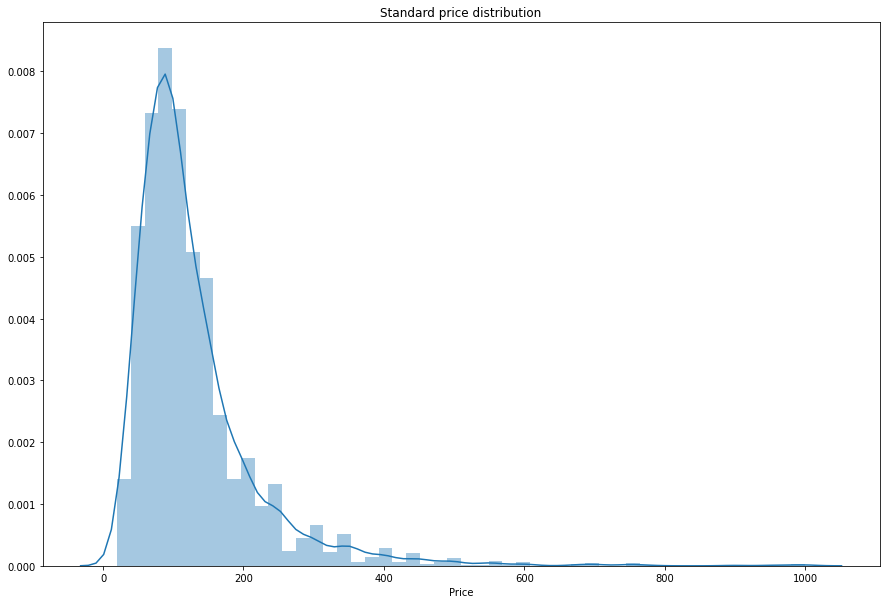

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(airbnb_df['price'], axlabel = 'Price').set_title('Standard price distribution')
print('Mean: ',airbnb_df['price'].mean(),' Std. Dev: ', airbnb_df['price'].std())
print('Mode: ',airbnb_df['price'].mode(), ' Median: ',airbnb_df['price'].median())

Mean:  788.4818317570931  Std. Dev:  532.3522687481143
Mode:  0    500.0
dtype: float64  Median:  650.0


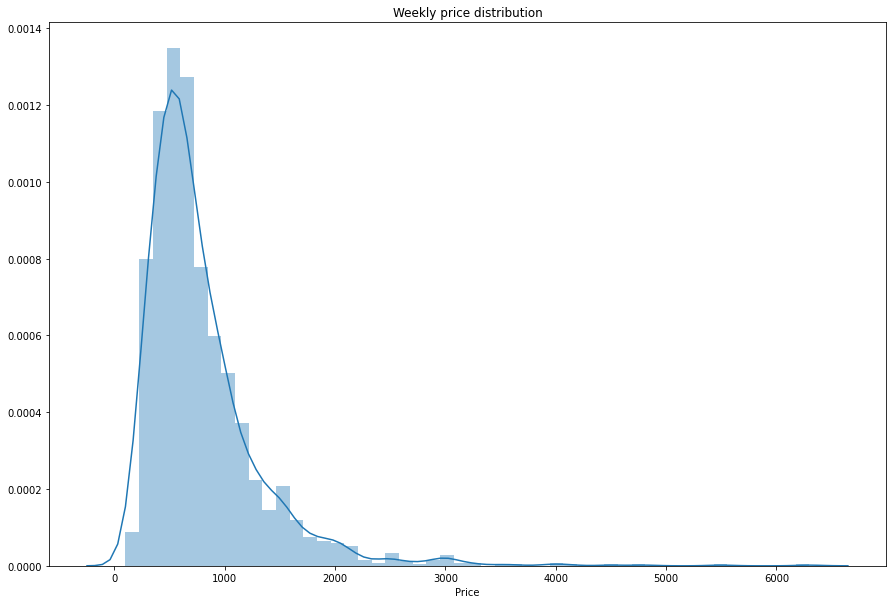

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(airbnb_df['weekly_price'], axlabel = 'Price').set_title('Weekly price distribution')
print('Mean: ',airbnb_df['weekly_price'].mean(),' Std. Dev: ', airbnb_df['weekly_price'].std())
print('Mode: ',airbnb_df['weekly_price'].mode(), ' Median: ',airbnb_df['weekly_price'].median())

Mean:  2613.336189848385  Std. Dev:  1722.2679811919616
Mode:  0    2500.0
dtype: float64  Median:  2200.0


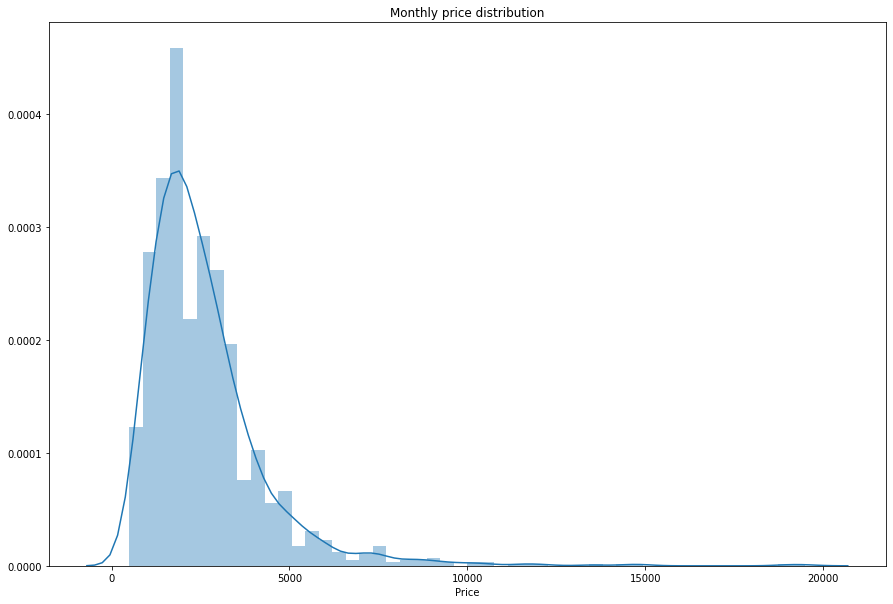

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(airbnb_df['monthly_price'], axlabel = 'Price').set_title('Monthly price distribution')
print('Mean: ',airbnb_df['monthly_price'].mean(),' Std. Dev: ', airbnb_df['monthly_price'].std())
print('Mode: ',airbnb_df['monthly_price'].mode(), ' Median: ',airbnb_df['monthly_price'].median())

We know the mean and distribution of prices for each type. But are convenient weekly and monthly prices?

Mean:  0.930512904688885  Std. Dev:  0.19350354371569953
Mode:  0    0.857143
dtype: float64  Median:  0.9047619047619048
Ratio over 1:  0.22896963663514186


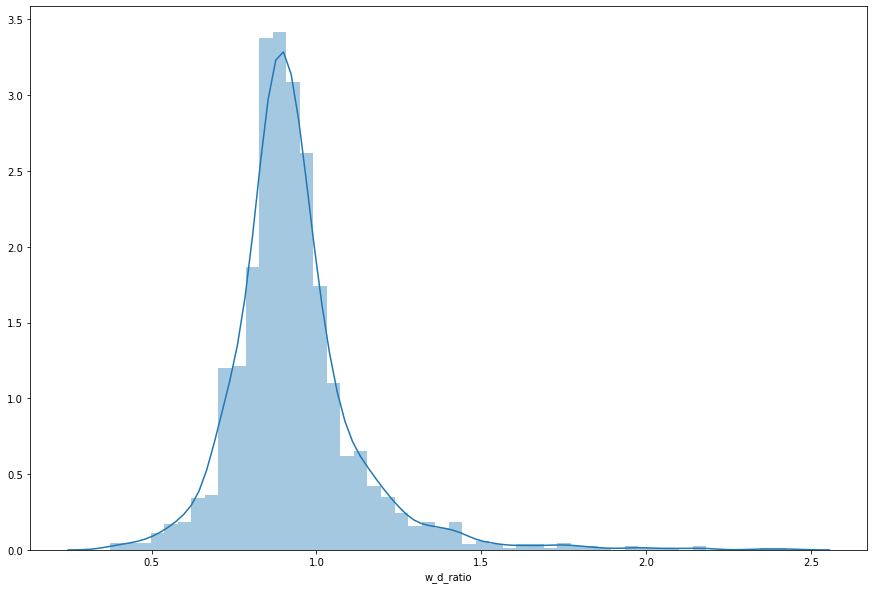

In [11]:
weekly_df = airbnb_df[airbnb_df['weekly_price'].isnull() == False]
weekly_df = pd.concat([weekly_df, pd.DataFrame(weekly_df['weekly_price']/(weekly_df['price']*7), columns=['w_d_ratio'])], axis = 1)

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(weekly_df['w_d_ratio'])
print('Mean: ',weekly_df['w_d_ratio'].mean(),' Std. Dev: ', weekly_df['w_d_ratio'].std())
print('Mode: ',weekly_df['w_d_ratio'].mode(), ' Median: ',weekly_df['w_d_ratio'].median())
print('Ratio over 1: ',weekly_df[weekly_df['w_d_ratio'] > 1].w_d_ratio.count()/weekly_df.shape[0])

Mean:  0.7928802580859332  Std. Dev:  0.23161503275330675
Mode:  0    0.714286
dtype: float64  Median:  0.7653061224489796
Ratio over 1:  0.1133816743572841


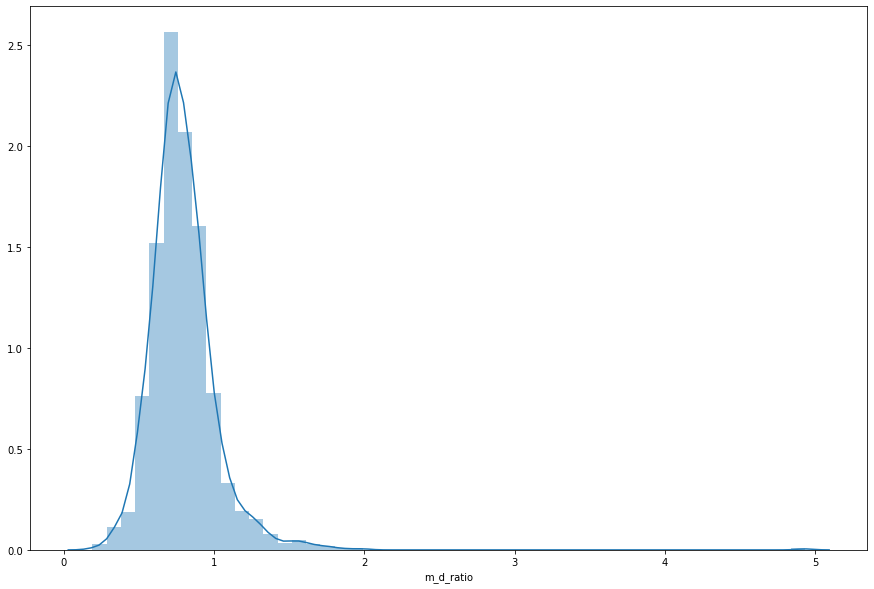

In [12]:
monthly_df = airbnb_df[airbnb_df['monthly_price'].isnull() == False]
monthly_df = pd.concat([monthly_df, pd.DataFrame(monthly_df['monthly_price']/(monthly_df['price']*28), columns=['m_d_ratio'])], axis = 1) #monthly price starts from 28th days
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(monthly_df['m_d_ratio'])
monthly_df[monthly_df['m_d_ratio'] > 1].m_d_ratio.count()/monthly_df.shape[0]
print('Mean: ',monthly_df['m_d_ratio'].mean(),' Std. Dev: ', monthly_df['m_d_ratio'].std())
print('Mode: ',monthly_df['m_d_ratio'].mode(), ' Median: ',monthly_df['m_d_ratio'].median())
print('Ratio over 1: ',monthly_df[monthly_df['m_d_ratio'] > 1].m_d_ratio.count()/monthly_df.shape[0])

We can generally assume that weekly and monthly prices are convenient. But this assumption is not always true, because 20% of the weekly price is worse than the daily price. 
In the monthly price this percentage drop to 10%.

# Which factors do they influence the price?

In [13]:
daily_df = airbnb_df.drop(columns=['weekly_price','monthly_price'])

na_mean = pd.concat([daily_df.isnull().mean().rename("mean"),daily_df.dtypes.rename("types")], axis = 1)
na_mean[na_mean['mean'] > 0.4]

,mean,types
notes,0.420639,object
square_feet,0.974594,float64
security_deposit,0.511262,object
license,1.000000,float64


In [14]:
airbnb_df[['neighbourhood_group_cleansed',
       'room_type',
'requires_license',
'cancellation_policy',
'require_guest_profile_picture',
'require_guest_phone_verification']].describe()


,neighbourhood_group_cleansed,room_type,requires_license,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3818,3818,3818,3818,3818
unique,17,3,1,3,2,2
top,Other neighborhoods,Entire home/apt,f,strict,f,f
freq,794,2541,3818,1417,3497,3443


In [15]:
df = airbnb_df.select_dtypes(['float64','int64']).drop(columns=['id','license','scrape_id','host_id','latitude','longitude','square_feet'])
LE = s.preprocessing.LabelEncoder()
df = df.fillna(df.mean())
df = pd.concat([df, airbnb_df['neighbourhood_group_cleansed'],airbnb_df['room_type']], axis = 1)
df['room_type'] = LE.fit_transform(df.room_type)
df['neighbourhood_group_cleansed'] = LE.fit_transform(df.neighbourhood_group_cleansed)
daily_df = df
weekly_df = df[df['weekly_price'].isnull() == False].drop(columns=['price','monthly_price'])
monthly_df = df[df['monthly_price'].isnull() == False].drop(columns=['price','weekly_price'])


We proceed with a qualitative analysis using the coefficient of linear regression. To determine which predictors are significant to predict prices, we show a look at a correlation matrix.

In [16]:
df.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,neighbourhood_group_cleansed,room_type
host_listings_count,1.000000,1.000000,0.071245,0.083879,0.052216,0.089905,0.010237,0.008437,0.002600,-0.016916,0.059129,0.073244,0.137749,0.150677,0.159408,0.129203,0.058727,-0.125155,-0.118059,-0.063510,-0.082358,-0.068486,-0.035852,-0.144439,0.866224,-0.072658,-0.033169,0.059446
host_total_listings_count,1.000000,1.000000,0.071245,0.083879,0.052216,0.089905,0.010237,0.008437,0.002600,-0.016916,0.059129,0.073244,0.137749,0.150677,0.159408,0.129203,0.058727,-0.125155,-0.118059,-0.063510,-0.082358,-0.068486,-0.035852,-0.144439,0.866224,-0.072658,-0.033169,0.059446
accommodates,0.071245,0.071245,1.000000,0.418539,0.657282,0.826937,0.657318,0.430096,0.350440,0.386057,0.214235,0.002487,-0.062457,-0.070628,-0.077225,-0.080167,-0.026376,-0.000910,-0.021257,0.030701,0.011759,0.008448,0.007881,-0.059375,-0.035700,-0.133886,0.054926,-0.571893
bathrooms,0.083879,0.083879,0.418539,1.000000,0.542724,0.440610,0.373384,0.246251,0.207031,0.119043,0.154343,-0.018060,-0.042826,-0.044238,-0.044280,-0.010406,-0.088366,0.068705,-0.006302,0.006730,0.007032,-0.022824,-0.010988,0.009658,0.008806,-0.176577,0.009160,-0.111478
bedrooms,0.052216,0.052216,0.657282,0.542724,1.000000,0.681320,0.517747,0.351439,0.291338,0.242341,0.230225,0.006826,-0.058821,-0.064396,-0.068124,-0.046731,-0.100908,0.026127,-0.025695,-0.013420,0.010784,-0.007202,-0.023096,-0.013819,-0.038566,-0.221023,0.070540,-0.243881
beds,0.089905,0.089905,0.826937,0.440610,0.681320,1.000000,0.563034,0.368248,0.291918,0.305401,0.216422,0.012954,-0.037701,-0.044842,-0.051555,-0.038369,-0.070940,-0.011299,-0.049010,0.003619,-0.015572,-0.024567,-0.025160,-0.041164,-0.011667,-0.155414,0.067869,-0.440522
price,0.010237,0.010237,0.657318,0.373384,0.517747,0.563034,1.000000,0.614838,0.484192,0.280718,0.269282,0.014317,-0.032114,-0.038276,-0.042809,-0.032289,-0.110405,0.071231,0.021444,0.061376,0.001407,0.007910,0.112057,-0.065877,-0.089121,-0.229775,-0.021711,-0.646205
weekly_price,0.008437,0.008437,0.430096,0.246251,0.351439,0.368248,0.614838,1.000000,0.726778,0.177525,0.129261,0.007765,-0.014169,-0.029390,-0.038056,-0.052657,-0.085940,0.027803,0.025625,0.042748,0.002372,-0.000601,0.085378,-0.085769,-0.058270,-0.090123,-0.058758,-0.400150
monthly_price,0.002600,0.002600,0.350440,0.207031,0.291338,0.291918,0.484192,0.726778,1.000000,0.187100,0.071879,-0.029707,0.016827,0.003002,-0.010416,-0.053899,-0.027922,0.045063,0.048201,0.066874,0.026041,0.022930,0.085409,-0.042429,-0.057073,-0.003738,-0.077660,-0.312372
guests_included,-0.016916,-0.016916,0.386057,0.119043,0.242341,0.305401,0.280718,0.177525,0.187100,1.000000,0.105326,-0.079940,-0.033191,-0.036332,-0.034502,-0.062392,0.157758,0.032630,0.065049,0.051577,0.107946,0.093380,0.028091,-0.001280,-0.029874,0.036422,0.028861,-0.276662


In [17]:
def get_linear_regression(X,y, title = 'Non disponibile'):
    min_max_scaler = preprocessing.StandardScaler()
    X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X.values), columns=X.columns)
    y_scaled = pd.DataFrame(min_max_scaler.fit_transform(np.log(y.values).reshape(-1,1)), columns = [y.name])

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=22)

    lm_model = Ridge(random_state = 22)
    lm_model.fit(X_train, y_train)

    y_pred = lm_model.predict(X_test)

    r2_score = s.metrics.r2_score(y_test, y_pred)
    coeff_df = pd.DataFrame(lm_model.coef_[0], index = X_scaled.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending = False)
    #print(coeff_df)
  
    seabornInstance.set_context('paper')
    f, ax = plt.subplots(figsize = (6,15))
    g = seabornInstance.barplot(x=coeff_df.Coefficient, y=coeff_df.index, palette="vlag").set_title(title)
    
    seabornInstance.despine(left = True, bottom = True)
    plt.show()
    #coeff_df.plot(kind='barh', figsize=(12, 8))
    
    
    print('R^2:',r2_score)
    print('Mean Absolute Error:', s.metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', s.metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(s.metrics.mean_squared_error(y_test, y_pred)))

Now we proceed with the analysis of the linear regression's coefficient. To compare the coefficients of our predictors, we should normalize the dataset. It's necessary because the regression coefficient expresses how much increase outcome compared to one unit of the predictor. 

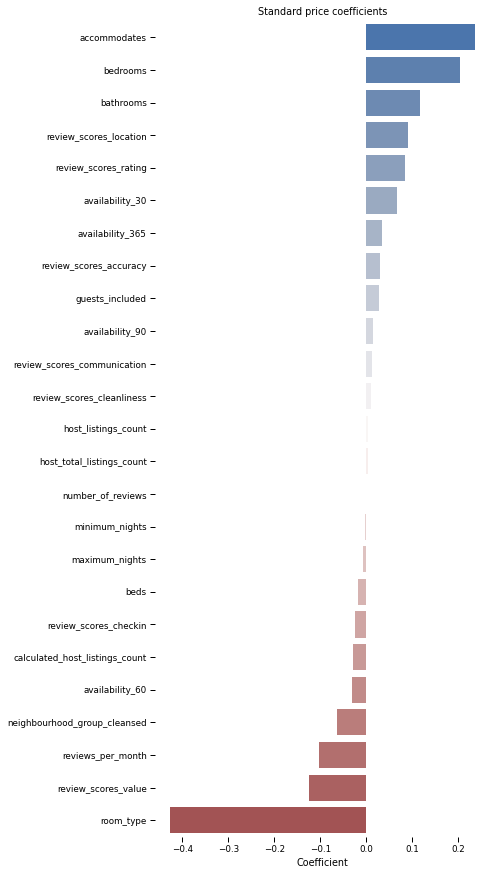

R^2: 0.647804674643172
Mean Absolute Error: 0.4598917787725864
Mean Squared Error: 0.3546676487002774
Root Mean Squared Error: 0.5955397960676325


In [18]:
#X = daily_df[['review_scores_cleanliness','accommodates', 'bathrooms' ,'bedrooms' ,'beds' ,'guests_included','room_type']]
X = daily_df[['host_listings_count','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month','neighbourhood_group_cleansed','room_type']]
y = daily_df['price']

get_linear_regression(X,y, 'Standard price coefficients')

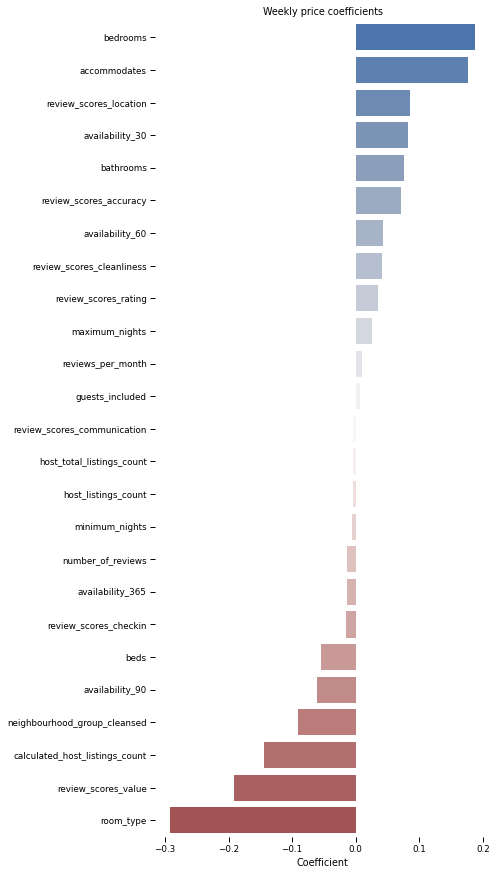

R^2: 0.33224829158377156
Mean Absolute Error: 0.6173885921347091
Mean Squared Error: 0.6381349358816606
Root Mean Squared Error: 0.7988334844519605


In [19]:
X = weekly_df[['host_listings_count','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month','neighbourhood_group_cleansed','room_type']]
y = weekly_df['weekly_price']

get_linear_regression(X,y, 'Weekly price coefficients')

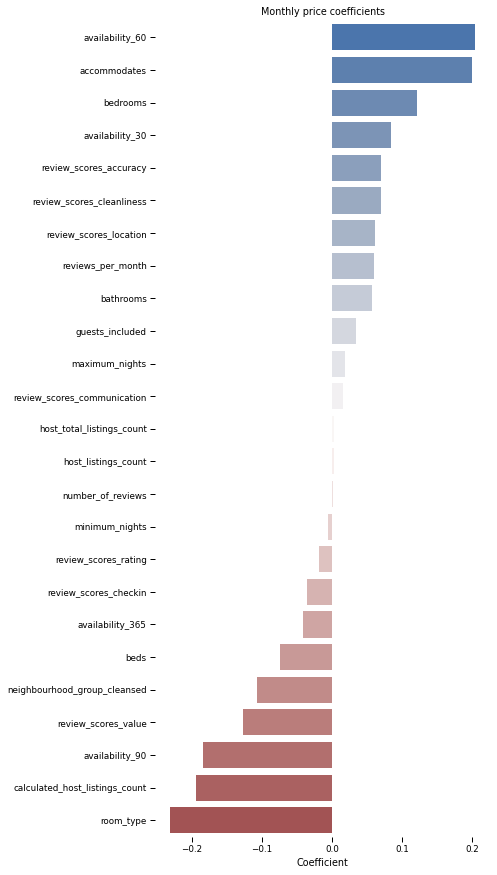

R^2: 0.27543082757721704
Mean Absolute Error: 0.6039477463667748
Mean Squared Error: 0.691742436995763
Root Mean Squared Error: 0.8317105488063519


In [20]:
X = monthly_df[['host_listings_count','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month','neighbourhood_group_cleansed','room_type']]
y = monthly_df['monthly_price']

get_linear_regression(X,y, 'Monthly price coefficients')

We observe that the most important predictors for the price are the bedroom, accommodate, bathroom, room type, and review score value variables.
Similarly,  these predictors are the most important for both weekly and monthly prices.
An important aspect to consider it's that accuracy of the weekly price and monthly regression is low.

# Do Poi influence the price?


In [21]:
poi_df = pd.concat([poi_df,airbnb_df.price], axis = 1)
poi_df = pd.concat([poi_df,airbnb_df.weekly_price], axis = 1)
poi_df = pd.concat([poi_df,airbnb_df.monthly_price], axis = 1)
poi_df = poi_df.drop('Unnamed: 0', axis = 1)

In [22]:
poi_df.describe()

,historic,shop,tourism,office,emergency,station,craft,amenity,public_transport,price,weekly_price,monthly_price
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,2009.000000,1517.000000
mean,23.983761,1090.045836,305.942116,290.857255,118.269513,0.548979,23.742273,4511.218439,1519.377947,127.976166,788.481832,2613.336190
std,11.330519,462.190443,140.779566,134.229349,52.511919,0.497660,10.098965,2051.371175,500.811507,90.250022,532.352269,1722.267981
min,0.000000,42.000000,20.000000,11.000000,6.000000,0.000000,0.000000,148.000000,75.000000,20.000000,100.000000,500.000000
25%,14.000000,772.250000,186.000000,169.000000,76.000000,0.000000,21.000000,3045.500000,1253.500000,75.000000,455.000000,1512.000000
50%,26.000000,1222.000000,361.000000,340.500000,134.000000,1.000000,26.000000,5184.500000,1682.000000,100.000000,650.000000,2200.000000
75%,34.000000,1426.000000,433.000000,412.000000,161.000000,1.000000,29.000000,6010.750000,1872.750000,150.000000,950.000000,3150.000000
max,39.000000,1883.000000,489.000000,465.000000,203.000000,1.000000,42.000000,7843.000000,2283.000000,1000.000000,6300.000000,19500.000000


In [23]:
poi_df.drop(columns=['weekly_price','monthly_price']).corr().style.background_gradient(cmap='coolwarm')

,historic,shop,tourism,office,emergency,station,craft,amenity,public_transport,price
historic,1.000000,0.922980,0.978511,0.966682,0.958818,0.859775,0.803984,0.925087,0.746758,0.141713
shop,0.922980,1.000000,0.956046,0.963195,0.972974,0.787527,0.919254,0.991234,0.908772,0.140090
tourism,0.978511,0.956046,1.000000,0.991513,0.967980,0.881713,0.844356,0.955355,0.793670,0.155208
office,0.966682,0.963195,0.991513,1.000000,0.967186,0.861079,0.862775,0.957655,0.814075,0.151204
emergency,0.958818,0.972974,0.967980,0.967186,1.000000,0.815780,0.871694,0.972582,0.852237,0.132974
station,0.859775,0.787527,0.881713,0.861079,0.815780,1.000000,0.636384,0.763462,0.506702,0.141872
craft,0.803984,0.919254,0.844356,0.862775,0.871694,0.636384,1.000000,0.916644,0.875259,0.139079
amenity,0.925087,0.991234,0.955355,0.957655,0.972582,0.763462,0.916644,1.000000,0.918596,0.145576
public_transport,0.746758,0.908772,0.793670,0.814075,0.852237,0.506702,0.875259,0.918596,1.000000,0.126092
price,0.141713,0.140090,0.155208,0.151204,0.132974,0.141872,0.139079,0.145576,0.126092,1.000000


In [24]:
poi_df.drop(columns=['monthly_price']).dropna(axis=0).corr().style.background_gradient(cmap='coolwarm')

,historic,shop,tourism,office,emergency,station,craft,amenity,public_transport,price,weekly_price
historic,1.000000,0.925468,0.978916,0.968102,0.959796,0.857607,0.808369,0.926757,0.746989,0.168668,0.176554
shop,0.925468,1.000000,0.956804,0.963302,0.973925,0.787452,0.919458,0.991542,0.908024,0.159314,0.164728
tourism,0.978916,0.956804,1.000000,0.991370,0.967770,0.880223,0.844713,0.955726,0.793490,0.179362,0.189474
office,0.968102,0.963302,0.991370,1.000000,0.967076,0.858740,0.863134,0.957842,0.811779,0.175873,0.186010
emergency,0.959796,0.973925,0.967770,0.967076,1.000000,0.809790,0.875616,0.974547,0.853908,0.160781,0.166368
station,0.857607,0.787452,0.880223,0.858740,0.809790,1.000000,0.639232,0.765638,0.505335,0.164681,0.179054
craft,0.808369,0.919458,0.844713,0.863134,0.875616,0.639232,1.000000,0.917162,0.872663,0.152497,0.155963
amenity,0.926757,0.991542,0.955726,0.957842,0.974547,0.765638,0.917162,1.000000,0.918245,0.161771,0.167995
public_transport,0.746989,0.908024,0.793490,0.811779,0.853908,0.505335,0.872663,0.918245,1.000000,0.143846,0.149107
price,0.168668,0.159314,0.179362,0.175873,0.160781,0.164681,0.152497,0.161771,0.143846,1.000000,0.937861


In [25]:
poi_df.dropna(axis=0).corr().style.background_gradient(cmap='coolwarm')

,historic,shop,tourism,office,emergency,station,craft,amenity,public_transport,price,weekly_price,monthly_price
historic,1.000000,0.925248,0.979707,0.968314,0.958414,0.854879,0.814095,0.926503,0.744603,0.190797,0.200237,0.189512
shop,0.925248,1.000000,0.955137,0.961215,0.973677,0.783229,0.923007,0.990778,0.905870,0.169821,0.176759,0.171135
tourism,0.979707,0.955137,1.000000,0.991327,0.965776,0.877911,0.846724,0.953659,0.788430,0.198204,0.210041,0.199664
office,0.968314,0.961215,0.991327,1.000000,0.964013,0.857495,0.865851,0.955474,0.805559,0.194669,0.207310,0.196431
emergency,0.958414,0.973677,0.965776,0.964013,1.000000,0.804401,0.880589,0.975021,0.853040,0.175604,0.184912,0.177868
station,0.854879,0.783229,0.877911,0.857495,0.804401,1.000000,0.644155,0.759166,0.495844,0.191925,0.204923,0.194305
craft,0.814095,0.923007,0.846724,0.865851,0.880589,0.644155,1.000000,0.919056,0.867397,0.151649,0.157397,0.160225
amenity,0.926503,0.990778,0.953659,0.955474,0.975021,0.759166,0.919056,1.000000,0.916664,0.170811,0.178473,0.172881
public_transport,0.744603,0.905870,0.788430,0.805559,0.853040,0.495844,0.867397,0.916664,1.000000,0.146931,0.154368,0.153991
price,0.190797,0.169821,0.198204,0.194669,0.175604,0.191925,0.151649,0.170811,0.146931,1.000000,0.932105,0.875837


In [26]:
df2 = pd.concat([df, poi_df.drop(columns=['price','weekly_price','monthly_price'])], axis = 1)

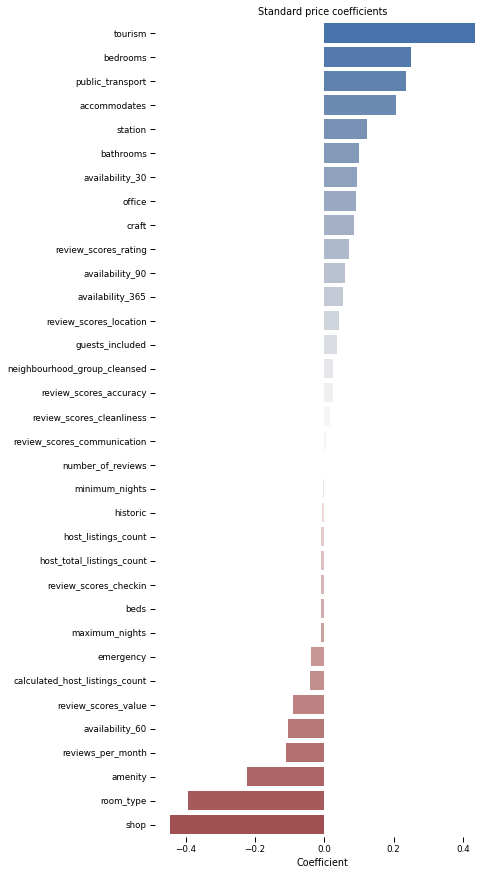

R^2: 0.6783667520346102
Mean Absolute Error: 0.43843270394013567
Mean Squared Error: 0.32389103314799744
Root Mean Squared Error: 0.5691142531583596


In [27]:
X = df2[['host_listings_count','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month','neighbourhood_group_cleansed','room_type','tourism','craft', 'emergency', 'amenity', 'shop', 'station', 'historic', 'public_transport', 'office']]
y = df2['price']

get_linear_regression(X,y, 'Standard price coefficients')


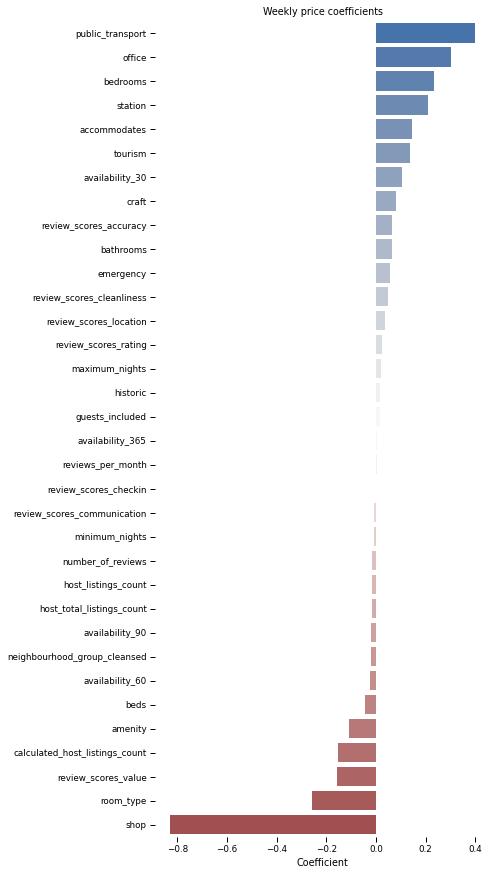

R^2: 0.3626067112553636
Mean Absolute Error: 0.6067288352074836
Mean Squared Error: 0.6091230023344619
Root Mean Squared Error: 0.7804633254256487


In [28]:
df_weeklyprice = df2.drop(columns=['monthly_price']).dropna(axis = 0)
X = df_weeklyprice[['host_listings_count','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month','neighbourhood_group_cleansed','room_type','tourism','craft', 'emergency', 'amenity', 'shop', 'station', 'historic', 'public_transport', 'office']]

y = df_weeklyprice['weekly_price']

get_linear_regression(X,y, 'Weekly price coefficients')


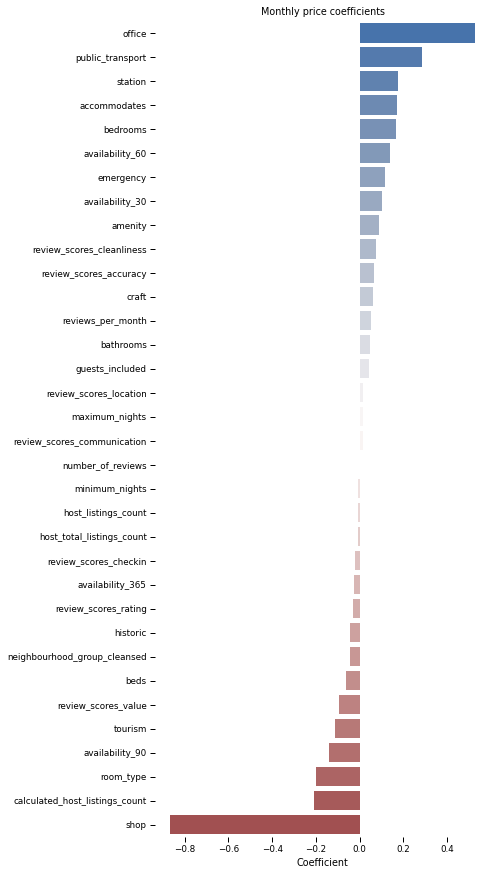

R^2: 0.28977902481133055
Mean Absolute Error: 0.6017048700219041
Mean Squared Error: 0.6780442873932429
Root Mean Squared Error: 0.8234344463242006


In [29]:
df_montlyprice = df2.dropna(axis = 0)
X = df_montlyprice[['host_listings_count','host_total_listings_count','accommodates','bathrooms','bedrooms','beds','guests_included','minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','reviews_per_month','neighbourhood_group_cleansed','room_type','tourism','craft', 'emergency', 'amenity', 'shop', 'station', 'historic', 'public_transport', 'office']]
y = df_montlyprice['monthly_price']

get_linear_regression(X,y, 'Monthly price coefficients')

Combining the Airbnb dataset and the Poi dataset, the scenario looks different than precedent. For each price, we have a different situation. For the daily price, the principal predictors are tourism, bedroom, public transport, shop, and room type.
In the weekly price and more in monthly price,  the tourism predictor loses importance, while office and public transport predictors acquire more importance. 
Anyway, as in the previous question, weekly and monthly price models have low accuracy.